In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from RandomForest import RandomForest
from TreeOperations import TreeOperations
from sklearn.ensemble import RandomForestClassifier
from Methods import Methods

In [2]:
df = pd.read_csv("encoded_final.csv")

In [4]:
# Split the dataset into training, validation, and testing sets
X = df.drop(columns = ['Credit_Score_encoded'])
y = df['Credit_Score_encoded']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 42)

# Random Forest (pre- SMOTE)

In [32]:
# Create an instance of the RandomForest class
rf_classifier = RandomForest(X_train, y_train, X_val, y_val, X_test, y_test)
rf_classifier

In [33]:
# Method 1: Random Forest with default parameters
rf_classifier.Random_Forest_Classic()

Random Forest Classifier's validation accuracy is 0.8332
----------------------------------------------------------------------
Random Forest Classifier's validation classification report is: 
               precision    recall  f1-score   support

           0       0.81      0.86      0.84      2894
           1       0.85      0.83      0.84      5317
           2       0.81      0.80      0.80      1789

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000

Random Forest Classifier's testing accuracy is 0.837
----------------------------------------------------------------------
Random Forest Classifier's testing classification report is: 
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      2980
           1       0.86      0.83      0.85      5282
           2       0.81      0.80      0.81      1738

    accuracy        

RandomForestClassifier(random_state=42)

In [34]:
grid_search_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [35]:
# Method 2: Random Forest with Best Parameters (GridSearchCV)
best_rf_grid, best_params_grid = rf_classifier.Random_Forest_GridSearchCV(grid_search_params, cv = 5)

c:\Users\Orange\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
394 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Orange\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Orange\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\Orange\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\bas

Random Forest Classifier's validation accuracy (GridSearchCV) is 0.8351
----------------------------------------------------------------------
Random Forest Classifier's validation classification report (GridSearchCV) is: 
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      2894
           1       0.86      0.83      0.84      5317
           2       0.80      0.80      0.80      1789

    accuracy                           0.84     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.84      0.84      0.84     10000

Random Forest Classifier's testing accuracy (GridSearchCV) is 0.8388
----------------------------------------------------------------------
Random Forest Classifier's testing classification report (GridSearchCV) is: 
               precision    recall  f1-score   support

           0       0.82      0.87      0.84      2980
           1       0.86      0.83      0.85      5282
           2  

In [37]:
# The best parameters found by GridSearchCV
best_params_grid

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [39]:
# Plotting the feature importance (Random Forest post GridSearchCV)
operations = TreeOperations(best_rf_grid, X_train, y_train, X_val, y_val, X_test, y_test)

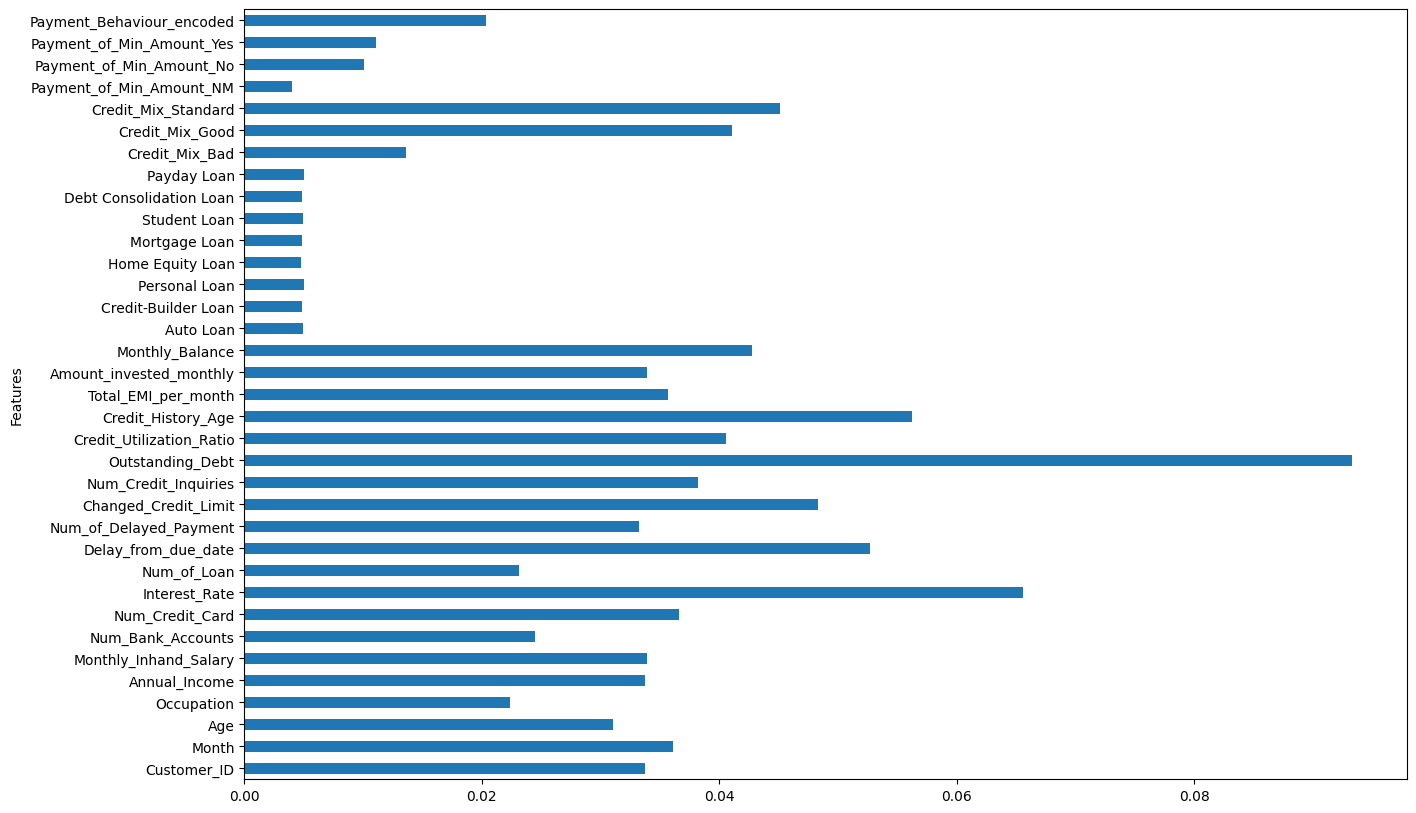

In [40]:
important_features = operations.feature_importance(X = X)

In [45]:
# Random Forest + PCA (GridSearch Params)
methods = Methods(best_rf_grid)

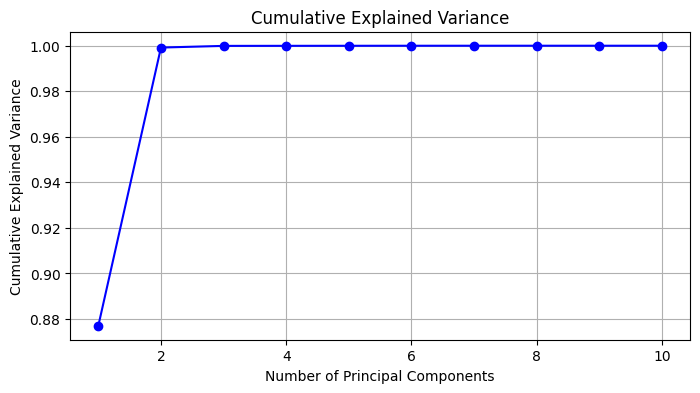

Validation Accuracy with Extracted Features: 0.781
----------------------------------------------------------------------
Validation classification report with Extracted Features:               precision    recall  f1-score   support

           0       0.79      0.79      0.79      2894
           1       0.79      0.81      0.80      5317
           2       0.74      0.69      0.71      1789

    accuracy                           0.78     10000
   macro avg       0.77      0.76      0.77     10000
weighted avg       0.78      0.78      0.78     10000

Test Accuracy with Extracted Features: 0.7797
----------------------------------------------------------------------
Test classification report with Extracted Features:               precision    recall  f1-score   support

           0       0.79      0.77      0.78      2980
           1       0.78      0.81      0.80      5282
           2       0.75      0.69      0.72      1738

    accuracy                           0.78     1000

In [46]:
# PCA (10 components)
pca_model, model_pca_trained, X_train_pca, X_val_pca, X_test_pca = methods.perform_Pca(X_train, y_train, X_val, y_val, X_test, y_test, num_components = 10)

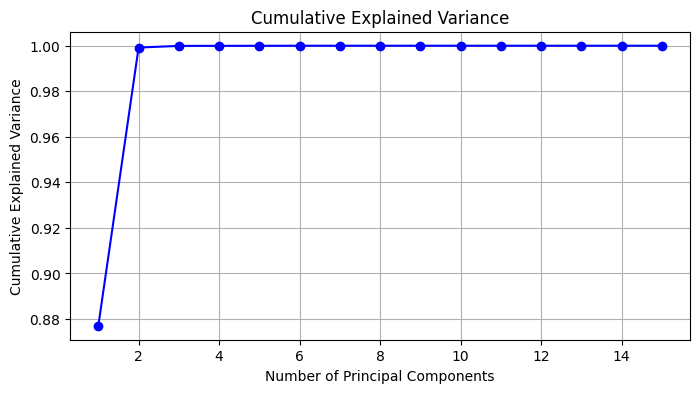

Validation Accuracy with Extracted Features: 0.7854
----------------------------------------------------------------------
Validation classification report with Extracted Features:               precision    recall  f1-score   support

           0       0.79      0.79      0.79      2894
           1       0.79      0.81      0.80      5317
           2       0.76      0.69      0.73      1789

    accuracy                           0.79     10000
   macro avg       0.78      0.76      0.77     10000
weighted avg       0.78      0.79      0.78     10000

Test Accuracy with Extracted Features: 0.7937
----------------------------------------------------------------------
Test classification report with Extracted Features:               precision    recall  f1-score   support

           0       0.80      0.80      0.80      2980
           1       0.80      0.82      0.81      5282
           2       0.77      0.69      0.73      1738

    accuracy                           0.79     100

In [47]:
# PCA (15 components)
pca_model, model_pca_trained, X_train_pca, X_val_pca, X_test_pca = methods.perform_Pca(X_train, y_train, X_val, y_val, X_test, y_test, num_components = 15)

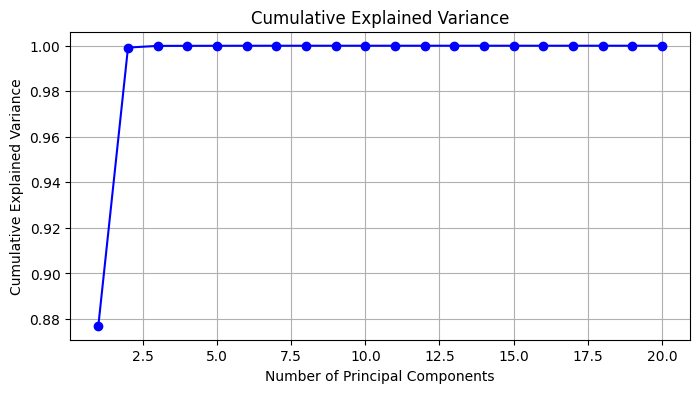

Validation Accuracy with Extracted Features: 0.8002
----------------------------------------------------------------------
Validation classification report with Extracted Features:               precision    recall  f1-score   support

           0       0.81      0.81      0.81      2894
           1       0.80      0.84      0.82      5317
           2       0.80      0.67      0.73      1789

    accuracy                           0.80     10000
   macro avg       0.80      0.77      0.78     10000
weighted avg       0.80      0.80      0.80     10000

Test Accuracy with Extracted Features: 0.8036
----------------------------------------------------------------------
Test classification report with Extracted Features:               precision    recall  f1-score   support

           0       0.81      0.81      0.81      2980
           1       0.80      0.84      0.82      5282
           2       0.80      0.67      0.73      1738

    accuracy                           0.80     100

In [48]:
# PCA (20 components)
pca_model, model_pca_trained, X_train_pca, X_val_pca, X_test_pca = methods.perform_Pca(X_train, y_train, X_val, y_val, X_test, y_test, num_components = 20)

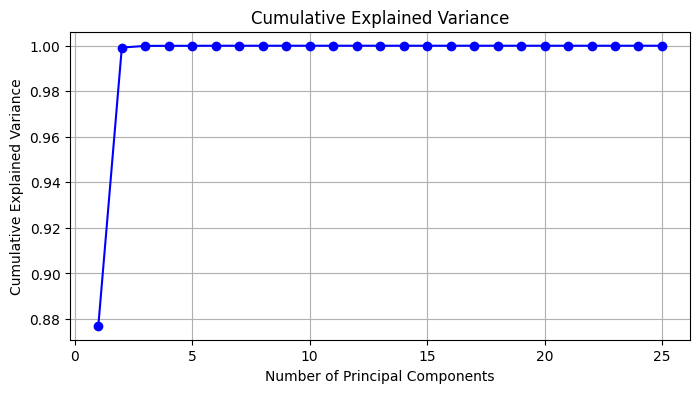

Validation Accuracy with Extracted Features: 0.8137
----------------------------------------------------------------------
Validation classification report with Extracted Features:               precision    recall  f1-score   support

           0       0.81      0.82      0.82      2894
           1       0.82      0.83      0.83      5317
           2       0.79      0.74      0.77      1789

    accuracy                           0.81     10000
   macro avg       0.81      0.80      0.80     10000
weighted avg       0.81      0.81      0.81     10000

Test Accuracy with Extracted Features: 0.8172
----------------------------------------------------------------------
Test classification report with Extracted Features:               precision    recall  f1-score   support

           0       0.82      0.82      0.82      2980
           1       0.82      0.84      0.83      5282
           2       0.79      0.75      0.77      1738

    accuracy                           0.82     100

In [49]:
# PCA (25 components)
pca_model, model_pca_trained, X_train_pca, X_val_pca, X_test_pca = methods.perform_Pca(X_train, y_train, X_val, y_val, X_test, y_test, num_components = 25)

- Accuracy seems to be increasing, attempting to transform all the components.

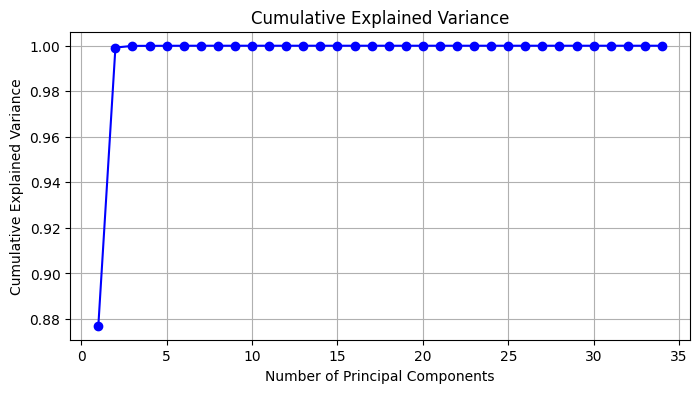

Validation Accuracy with Extracted Features: 0.815
----------------------------------------------------------------------
Validation classification report with Extracted Features:               precision    recall  f1-score   support

           0       0.81      0.83      0.82      2894
           1       0.83      0.83      0.83      5317
           2       0.79      0.76      0.77      1789

    accuracy                           0.81     10000
   macro avg       0.81      0.80      0.81     10000
weighted avg       0.81      0.81      0.81     10000

Test Accuracy with Extracted Features: 0.8195
----------------------------------------------------------------------
Test classification report with Extracted Features:               precision    recall  f1-score   support

           0       0.82      0.83      0.82      2980
           1       0.83      0.83      0.83      5282
           2       0.78      0.76      0.77      1738

    accuracy                           0.82     1000

In [50]:
# PCA (34 components)
pca_model, model_pca_trained, X_train_pca, X_val_pca, X_test_pca = methods.perform_Pca(X_train, y_train, X_val, y_val, X_test, y_test, num_components = 34)

RFE + Random Forest Classifier with best parameters (found by GridSearchCV)
- This step is done to avoid re-running the code each time we encounter an error in the RFE function in class "Methods"

In [4]:
random2 = RandomForestClassifier(max_depth = None,
 max_features = 'sqrt',
 min_samples_leaf = 1,
 min_samples_split = 2,
 n_estimators = 300)

# Pass this model to the "Methods" class.
method = Methods(random2)

Round 10: Selected features - Annual_Income, Interest_Rate, Delay_from_due_date, Changed_Credit_Limit, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Total_EMI_per_month, Monthly_Balance, Credit_Mix_Good
Eliminated feature: Age

Round 9: Selected features - Annual_Income, Interest_Rate, Delay_from_due_date, Changed_Credit_Limit, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Total_EMI_per_month, Monthly_Balance, Credit_Mix_Good
Eliminated feature: Month

Round 8: Selected features - Annual_Income, Interest_Rate, Delay_from_due_date, Changed_Credit_Limit, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Total_EMI_per_month, Monthly_Balance, Credit_Mix_Good
Eliminated feature: Num_Credit_Card

Round 7: Selected features - Annual_Income, Interest_Rate, Delay_from_due_date, Changed_Credit_Limit, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Total_EMI_per_month, Monthly_Balance, Credit_Mix_Good
Eliminated feature: Monthly_In

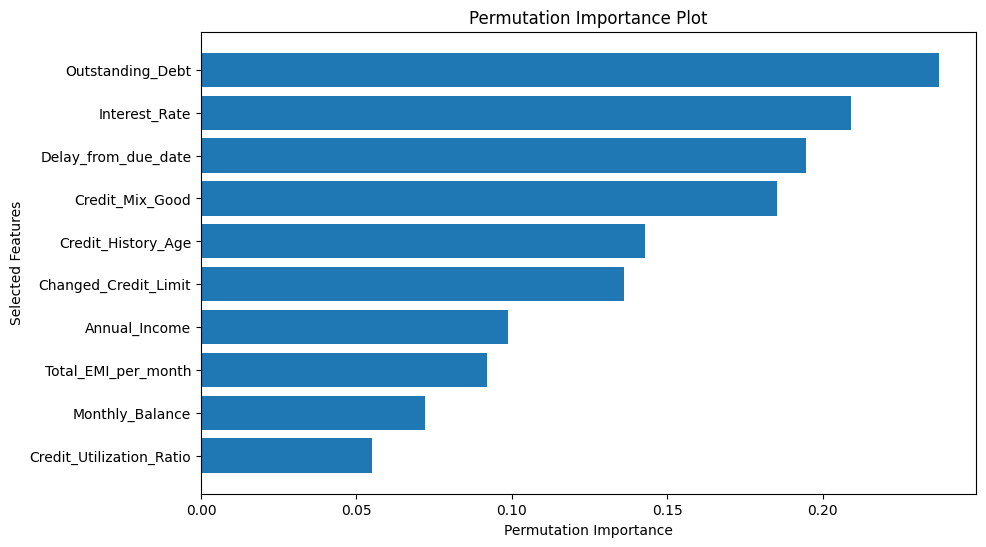

In [5]:
# RFE + Random Forest (GridSearchCV) (10 selected features)
rfe, model_rfe_trained, X_train_selected, X_val_selected, X_test_selected = method.rfe_Random_Forest(X_train, y_train, X_val, y_val, X_test, y_test, num_features_to_keep = 10)

Round 15: Selected features - Customer_ID, Annual_Income, Interest_Rate, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Total_EMI_per_month, Amount_invested_monthly, Monthly_Balance, Credit_Mix_Good, Credit_Mix_Standard
Eliminated feature: Auto Loan

Round 14: Selected features - Customer_ID, Annual_Income, Interest_Rate, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Total_EMI_per_month, Amount_invested_monthly, Monthly_Balance, Credit_Mix_Good, Credit_Mix_Standard
Eliminated feature: Student Loan

Round 13: Selected features - Customer_ID, Annual_Income, Interest_Rate, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Total_EMI_per_month, Amount_invested_monthly, Monthly_Bal

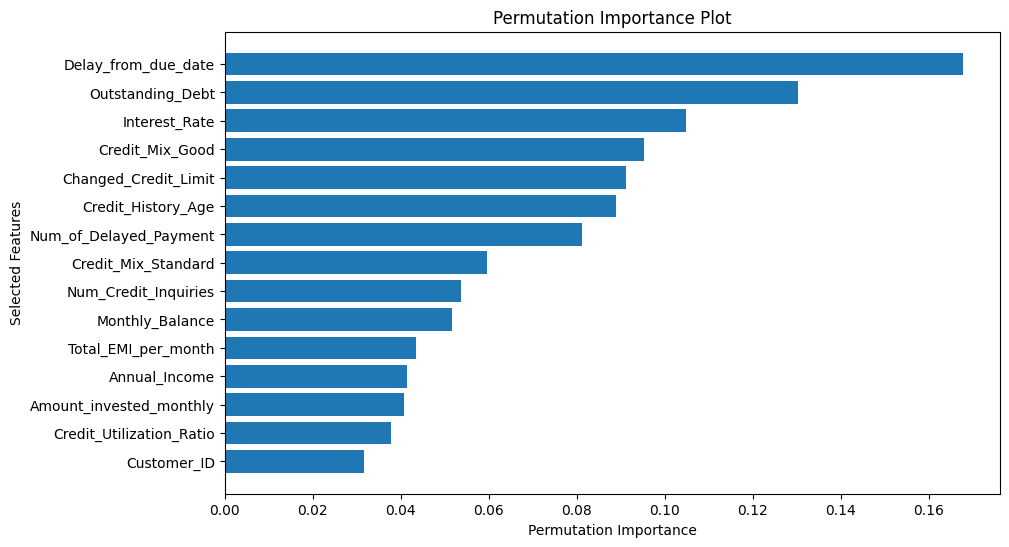

In [6]:
# RFE + Random Forest (GridSearchCV) (15 selected features)
rfe, model_rfe_trained, X_train_selected, X_val_selected, X_test_selected = method.rfe_Random_Forest(X_train, y_train, X_val, y_val, X_test, y_test, num_features_to_keep = 15)

# Random Forest (post- SMOTE)

In [9]:
# Import dataset, split data, create an instance of the methods class and pass a throwaway model.
df = pd.read_csv("encoded_final.csv")
X = df.drop(columns = ['Credit_Score_encoded'])
y = df['Credit_Score_encoded']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 42)

model = RandomForestClassifier()
methods_instance = Methods(model) # Pass any throwaway model just to make the instance work. 
#Make sure to create a different instance with the model that you actually want to perform operations on from the Methods class

# Perform SMOTE balancing
X_train_resampled, y_train_resampled = methods_instance.SMOTE_Balancing(X_train, y_train)


Class Distribution Before SMOTE:
{0: 23124, 1: 42575, 2: 14301}

Class Distribution After SMOTE:
{0: 42575, 1: 42575, 2: 42575}


In [9]:
# Use the newly sampled data along with the remaining data to create an insatnce of the RandomForest class.
Random2 = RandomForest(X_train_resampled, y_train_resampled, X_val, y_val, X_test, y_test)

In [10]:
# Method 1: Random Forest with default parameters
Random2.Random_Forest_Classic()

Random Forest Classifier's validation accuracy is 0.8177
----------------------------------------------------------------------
Random Forest Classifier's validation classification report is: 
               precision    recall  f1-score   support

           0       0.79      0.87      0.83      2894
           1       0.87      0.79      0.83      5317
           2       0.73      0.83      0.78      1789

    accuracy                           0.82     10000
   macro avg       0.80      0.83      0.81     10000
weighted avg       0.82      0.82      0.82     10000

Random Forest Classifier's testing accuracy is 0.8256
----------------------------------------------------------------------
Random Forest Classifier's testing classification report is: 
               precision    recall  f1-score   support

           0       0.80      0.87      0.84      2980
           1       0.88      0.80      0.83      5282
           2       0.74      0.84      0.79      1738

    accuracy       

RandomForestClassifier(random_state=42)

In [25]:
# Using re-sampled data on previously found best parameters (GridSearchCV from the previous step) to avoid expensive computation.
rf = RandomForestClassifier(max_depth = None,
 max_features = 'sqrt',
 min_samples_leaf = 1,
 min_samples_split = 2,
 n_estimators = 300)

rf.fit(X_train_resampled, y_train_resampled)
        
# Validation
pred_val = rf.predict(X_val)
# Evaluating validation
# Accuracy
accuracy_val = accuracy_score(y_val, pred_val)
# Classification report
report_val = classification_report(y_val, pred_val)

# Testing
pred_test = rf.predict(X_test)
# Evaluating testing
# Accuracy
accuracy_test = accuracy_score(y_test, pred_test)
# Classification report
report_test = classification_report(y_test, pred_test) 

# Printing the results
print(f"Random Forest Classifier's validation accuracy is {accuracy_val}")
print("-"*70)
print(f"Random Forest Classifier's validation classification report is: \n {report_val}")
print("="*100)
print(f"Random Forest Classifier's testing accuracy is {accuracy_test}")
print("-"*70)
print(f"Random Forest Classifier's testing classification report is: \n {report_test}")

Random Forest Classifier's validation accuracy is 0.821
----------------------------------------------------------------------
Random Forest Classifier's validation classification report is: 
               precision    recall  f1-score   support

           0       0.80      0.87      0.83      2894
           1       0.87      0.79      0.83      5317
           2       0.74      0.84      0.79      1789

    accuracy                           0.82     10000
   macro avg       0.80      0.83      0.81     10000
weighted avg       0.83      0.82      0.82     10000

Random Forest Classifier's testing accuracy is 0.8281
----------------------------------------------------------------------
Random Forest Classifier's testing classification report is: 
               precision    recall  f1-score   support

           0       0.80      0.87      0.84      2980
           1       0.88      0.80      0.84      5282
           2       0.75      0.85      0.79      1738

    accuracy        

There's been a slight accuracy decrease in comaprison to pre-SMOTE data

In [27]:
# Plotting the feature importance (Random Forest post GridSearchCV)
operations2 = TreeOperations(rf, X_train_resampled, y_train_resampled, X_val, y_val, X_test, y_test)

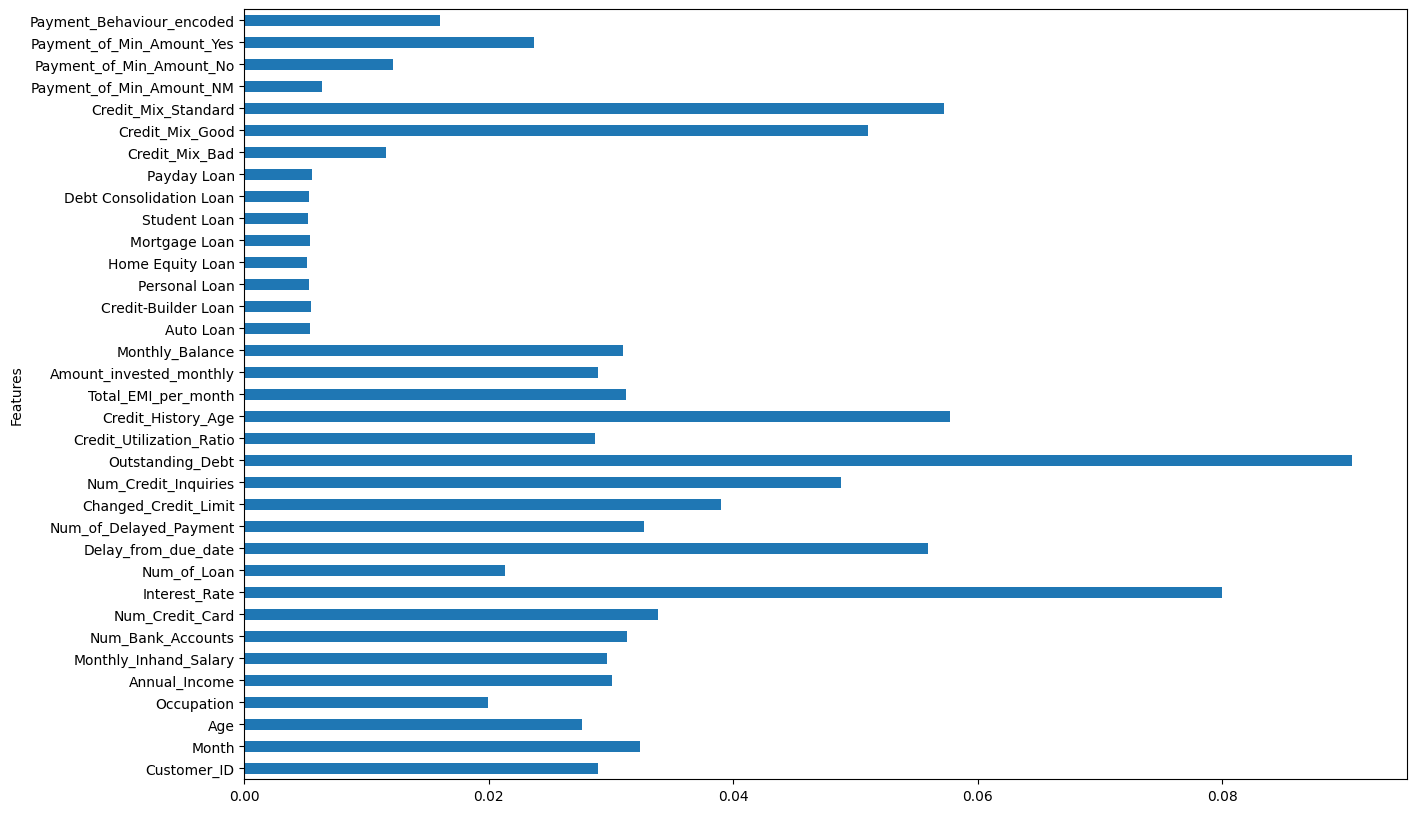

In [28]:
important_features = operations2.feature_importance(X = X)

No noticeable change in feature importance.

# Random Forest with Best Params (Stratify)

In [3]:
# Using Stratify
X_stratify = df.drop(columns=['Credit_Score_encoded'])
y_stratify = df['Credit_Score_encoded']

# Split the data into train, validation, and test sets with stratification
X_train_stra, X_temp_stra, y_train_stra, y_temp_stra = train_test_split(X_stratify, y_stratify, test_size = 0.2, random_state = 42, stratify = y_stratify)
X_val_stra, X_test_stra, y_val_stra, y_test_stra = train_test_split(X_temp_stra, y_temp_stra, test_size = 0.5, random_state = 42, stratify = y_temp_stra)


In [4]:
# Using RF with best parameters (GridSearchCV)
Random_Forest_stra = RandomForestClassifier(max_depth = None,
 max_features = 'sqrt',
 min_samples_leaf = 1,
 min_samples_split = 2,
 n_estimators = 300, random_state = 42)

Random_Forest_stra.fit(X_train_stra, y_train_stra)
        
# Validation
pred_val_stra = Random_Forest_stra.predict(X_val_stra)
# Evaluating validation
# Accuracy
accuracy_val_stra = accuracy_score(y_val_stra, pred_val_stra)
# Classification report
report_val_stra = classification_report(y_val_stra, pred_val_stra)

# Testing
pred_test_stra = Random_Forest_stra.predict(X_test_stra)
# Evaluating testing
# Accuracy
accuracy_test_stra = accuracy_score(y_test_stra, pred_test_stra)
# Classification report
report_test_stra = classification_report(y_test_stra, pred_test_stra) 

# Printing the results
print(f"Random Forest Classifier's validation accuracy is {accuracy_val_stra}")
print("-"*70)
print(f"Random Forest Classifier's validation classification report is: \n {report_val_stra}")
print("="*100)
print(f"Random Forest Classifier's testing accuracy is {accuracy_test_stra}")
print("-"*70)
print(f"Random Forest Classifier's testing classification report is: \n {report_test_stra}")

Random Forest Classifier's validation accuracy is 0.837
----------------------------------------------------------------------
Random Forest Classifier's validation classification report is: 
               precision    recall  f1-score   support

           0       0.81      0.86      0.83      2900
           1       0.86      0.83      0.85      5317
           2       0.82      0.82      0.82      1783

    accuracy                           0.84     10000
   macro avg       0.83      0.84      0.83     10000
weighted avg       0.84      0.84      0.84     10000

Random Forest Classifier's testing accuracy is 0.8422
----------------------------------------------------------------------
Random Forest Classifier's testing classification report is: 
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      2899
           1       0.86      0.84      0.85      5318
           2       0.81      0.81      0.81      1783

    accuracy        